# **TikTok Project**
**Course 4 - The Power of Statistics**

You are a data professional at TikTok. The current project is reaching its midpoint; a project proposal, Python coding work, and exploratory data analysis have all been completed.

The team has reviewed the results of the exploratory data analysis and the previous executive summary the team prepared. You received an email from Orion Rainier, Data Scientist at TikTok, with your next assignment: determine and conduct the necessary hypothesis tests and statistical analysis for the TikTok classification project.

A notebook was structured and prepared to help you in this project. Please complete the following questions.


# **Course 4 End-of-course project: Data exploration and hypothesis testing**

In this activity, you will explore the data provided and conduct hypothesis testing.
<br/>

**The purpose** of this project is to demostrate knowledge of how to prepare, create, and analyze hypothesis tests.

**The goal** is to apply descriptive and inferential statistics, probability distributions, and hypothesis testing in Python.
<br/>

*This activity has three parts:*

**Part 1:** Imports and data loading
* What data packages will be necessary for hypothesis testing?

**Part 2:** Conduct hypothesis testing
* How will descriptive statistics help you analyze your data?

* How will you formulate your null hypothesis and alternative hypothesis?

**Part 3:** Communicate insights with stakeholders

* What key business insight(s) emerge from your hypothesis test?

* What business recommendations do you propose based on your results?

<br/>

Follow the instructions and answer the questions below to complete the activity. Then, complete an executive summary using the questions listed on the PACE Strategy Document.


# **Data exploration and hypothesis testing**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document and those below to craft your response.

1. What is your research question for this data project? Later on, you will need to formulate the null and alternative hypotheses as the first step of your hypothesis test. Consider your research question now, at the start of this task.

Is there a difference in average video view count between videos from verified and unverified accounts?

*Complete the following steps to perform statistical analysis of your data:*

### **Task 1. Imports and Data Loading**

Import packages and libraries needed to compute descriptive statistics and conduct a hypothesis test.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Load the dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Analyze and Construct**

Consider the questions in your PACE Strategy Document and those below to craft your response:
1. Data professionals use descriptive statistics for Exploratory Data Analysis. How can computing descriptive statistics help you learn more about your data in this stage of your analysis?


- Descriptive statistics offer us a quick and brief summary overview of our data.
- They allow us to understand large amounts of data before proceeding with any analysis.
- Computing descriptive statistics offer us a quick and accurate way to calculate this statistics ie means, counts, standard deviations etc

### **Task 2. Data exploration**

Use descriptive statistics to conduct Exploratory Data Analysis (EDA).



Inspect the first five rows of the dataframe.

In [3]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Check for and handle missing values.

In [6]:
data.isnull().sum()


#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

#### It appears we have rows with missing data. We'll drop the missing rows.

In [7]:
# Drop rows with missing values

data = data.dropna()
data.isnull().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

[Text(0.5, 1.0, 'Verified vs unverified accounts')]

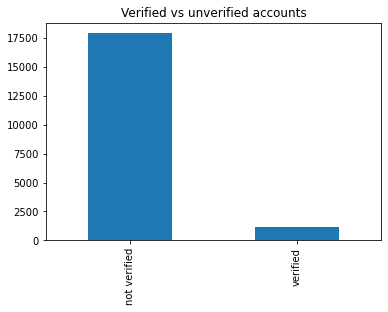

In [9]:
data['verified_status'].value_counts().plot(kind='bar').set(title='Verified vs unverified accounts')

Our data appears to be highly imbalanced in favor of not verified accounts

You are interested in the relationship between `verified_status` and `video_view_count`. One approach is to examine the mean value of `video_view_count` for each group of `verified_status` in the sample data.

In [20]:
# Compute the mean `video_view_count` for each group in `verified_status`

data.groupby('verified_status')['video_view_count'].mean()


verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

[Text(0.5, 1.0, 'Average view count')]

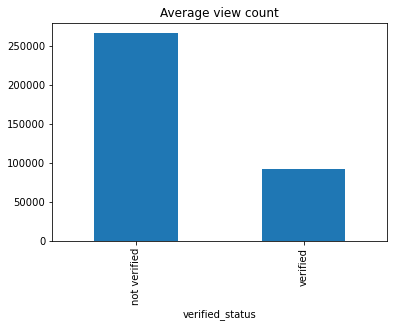

In [22]:
data.groupby('verified_status')['video_view_count'].mean().plot(kind='bar').set(title='Average view count')

### **Task 3. Hypothesis testing**

Before you conduct your hypothesis test, consider the following questions where applicable to complete your code response:

1. Recall the difference between the null hypothesis and the alternative hypotheses. What are your hypotheses for this data project?

* **Null Hypothesis** : States that there is no difference or relationship between two variables and if any exists it is due to chance or sampling variability.
* **Alternative Hypothesis** : States that there is a difference or a relationship between two variables and that it is not due to chance.



Your goal in this step is to conduct a two-sample t-test. Recall the steps for conducting a hypothesis test:


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis



- h(0); The null bypothesis states that there is no significant difference in view count between verified and not-verified accounts
- h(a); The alternative hypothesis is that there is a significant difference in view count between the two groups.



You choose 5% as the significance level and proceed with a two-sample t-test.

In [23]:
# separating the two groups

verified = data[data['verified_status'] == 'verified']
non_verified = data[data['verified_status'] == 'not verified']

In [24]:
stats.ttest_ind(a=verified['video_view_count'],b=non_verified['video_view_count'],equal_var=False)

Ttest_indResult(statistic=-25.499441780633777, pvalue=2.6088823687177823e-120)

**Question:** Based on the p-value you got above, do you reject or fail to reject the null hypothesis?


- P-value is 2.6e-120 which is quite small.
- It is smaller that our significance level meaning we have enough evidence to reject the null hypothesis.
- This means that there is a statistically significant difference in video_view_count between verified and non_verified accounts.


<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Documentto reflect on the Execute stage.

## **Step 4: Communicate insights with stakeholders**

*Ask yourself the following questions:*

1. What business insight(s) can you draw from the result of your hypothesis test?

- There appears to be a significant difference between the viewership in videos from these two groups.
- It could be worth looking into the content or behavioural similarities and differences between the groups.ie Does one group put up original content vs the others ie advertisements

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.